# The Office Scratchpad

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acquire

In [2]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [3]:
def the_office():
    '''
    Function to read the office series csv file,
    and drop null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the new df to a csv file
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the GuestStars column, too many null values
    df = df.drop(columns='GuestStars')
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office.csv')
    
    return df

In [4]:
# getting the office data using the office function 
df = the_office()
df.head()

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


In [ ]:
# reading the office series csv file
df = pd.read_csv('the_office_series.csv')
df.head() # check_yo_head

In [ ]:
df.info()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

In [ ]:
df.head()

In [ ]:
# looking at the shape of the data
df.shape

In [ ]:
# looking at the data info
df.info()

In [ ]:
# checking for nulls in the data
df.isna().sum()

It looks like there are only nulls in the Gueststar column,
I think I will make a gueststar df and then drop it for the original df

In [ ]:
def guest_office():
    '''
    Function to create a df where there are guest stars on the episode,
    drop the null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the df to a csv file 
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the null values in the GuestStars column
    df = df[df.GuestStars.notna()]
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title", "GuestStars": "Guest_Stars"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office_guest.csv')
    
    return df
    

In [ ]:
guest_df = guest_office()
guest_df.head()

In [ ]:
guest_df.shape

In [ ]:
df.head()

In [ ]:
df = df.drop(columns='GuestStars')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df = df.columns = [col.lower().replace('.', '_') for col in df]

In [ ]:
# looking at the episode with the most views
max_views = df.loc[df.viewership.idxmax()]
max_views

In [ ]:
# making a function for max views

def max_views():
    '''
    function that takes the office data
    and findes the episode with the most views
    '''
    # getting the office data
    df = the_office()
    # getting the episode data with the most views
    views = df.loc[df.viewership.idxmax()]
    
    return views

In [ ]:
max_views()

In [ ]:
# checking to see the most viewed episode on the guest df, looks like they are the same
guest_max = guest_df.loc[guest_df.viewership.idxmax()]
guest_max

In [ ]:
plt.scatter(df.episode, df.viewership)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [ ]:
# setting data required in visualizations
df['color'] = df['ratings'].apply(set_color)
df.head()

In [ ]:
plt.scatter(df.episode, df.ratings)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=df.index, 
           y=df.viewership,
           c=df.color,
          )
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
import plotly.express as px

# dataframe for average duration of each Season
avg_season = df.groupby(df.season)[['ratings']].mean().reset_index()

fig = px.scatter(avg_season, x = 'season', y = 'ratings',trendline = 'lowess',size = 'season',
                 title = '<b>Ratings over each Season</b>')
fig.show()

In [ ]:
import plotly.express as px
avg_season = df.groupby(df.season)[['ratings']].mean().reset_index()
fig = px.scatter(avg_season, x="season", y="ratings", color="ratings", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white", title = '<b>Ratings over each Season</b>')
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [ ]:
df_episodes = df.groupby('season').size().reset_index(name='episodes')
df_episodes

In [ ]:
def season_episodes():
    '''
    function that takes the office df and 
    makes a new df with the season and 
    number of episodes per season
    '''
    # getting the office data
    df = the_office()
    # creating a new df with seasons and episodes
    df_episodes = df.groupby('season').size().reset_index(name='episodes')
    
    return df_episodes

In [ ]:
season_episodes()

# Setting up for Clustering

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from wrangle import the_office

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format


In [6]:
# getting the office data again
df = the_office()

In [7]:
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.50,4936,11.20,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.30,4801,6.00,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.80,4024,5.80,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.10,3915,5.40,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.40,4294,5.00,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


array([[<AxesSubplot:title={'center':'episode'}>,
        <AxesSubplot:title={'center':'season'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'viewership'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

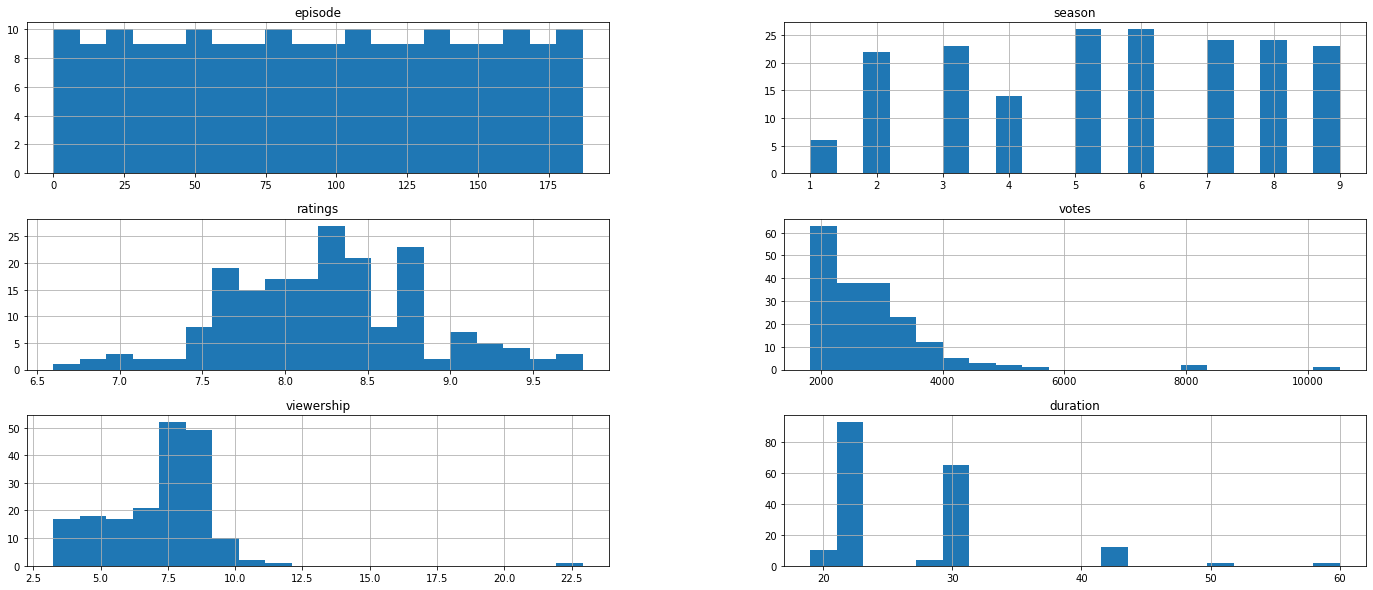

In [8]:
# histogram of the columns in the data
df.hist(figsize=(24, 10), bins=20)

In [9]:
# outliers functions
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color,episode_outliers,season_outliers,ratings_outliers,votes_outliers,viewership_outliers,duration_outliers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.50,4936,11.20,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow,0,0,0.00,357.00,0.00,0.00
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.30,4801,6.00,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen,0,0,0.00,222.00,0.00,0.00
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.80,4024,5.80,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow,0,0,0.00,0.00,0.00,0.00
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.10,3915,5.40,23,12 April 2005,Bryan Gordon,Michael Schur,yellow,0,0,0.00,0.00,0.00,0.00
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.40,4294,5.00,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen,0,0,0.00,0.00,0.00,0.00


In [10]:
# taking a look at what the outliers look like
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
episode_outliers
count                   0.00
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN
Name: episode_outliers, dtype: float64
~~~
season_outliers
count                   0.00
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN
Name: season_outliers, dtype: float64
~~~
ratings_outliers
count                   2.00
mean                    0.00
std                     0.00
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     0.00
Name: ratings_outliers, dtype: float64
~~~
votes_outliers
count                   8.00
mean                1,886.50
std                 2,175.03
min                 

- Votes: 8, std = 2,175
- Viewership: 1, std = 10.83
- Duration: 6, std = 7.63

In [11]:
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color,episode_outliers,season_outliers,ratings_outliers,votes_outliers,viewership_outliers,duration_outliers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.50,4936,11.20,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow,0,0,0.00,357.00,0.00,0.00
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.30,4801,6.00,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen,0,0,0.00,222.00,0.00,0.00
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.80,4024,5.80,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow,0,0,0.00,0.00,0.00,0.00
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.10,3915,5.40,23,12 April 2005,Bryan Gordon,Michael Schur,yellow,0,0,0.00,0.00,0.00,0.00
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.40,4294,5.00,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen,0,0,0.00,0.00,0.00,0.00


In [12]:
# episode, season, ratings, votes, viewership, duration, 
df = the_office()

df.drop(columns=['episode_title', 'about', 'date', 'director', 'writers', 'color', 'votes', 'duration', 'viewership'], inplace=True)
df.head()

,episode,season,ratings
0,0,1,7.50
1,1,1,8.30
2,2,1,7.80
3,3,1,8.10
4,4,1,8.40


In [13]:
# checking the info to see if the df is ready to explore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   episode  188 non-null    int64  
 1   season   188 non-null    int64  
 2   ratings  188 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.5 KB


In [14]:
# using a describe to see some df stats
df.describe()

,episode,season,ratings
count,188.00,188.00,188.00
mean,93.50,5.47,8.24
std,54.42,2.39,0.59
min,0.00,1.00,6.60
25%,46.75,3.00,7.80
50%,93.50,6.00,8.20
75%,140.25,7.25,8.60
max,187.00,9.00,9.80


In [15]:
# changing the df type to integer 
df = df.astype(int)

In [16]:
# double checking the df info after changing to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   episode  188 non-null    int64
 1   season   188 non-null    int64
 2   ratings  188 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [17]:
# train validate test split
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  315
validate observations:  135
test observations:  114


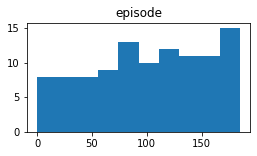

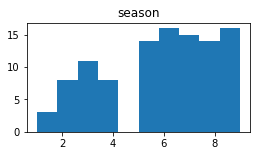

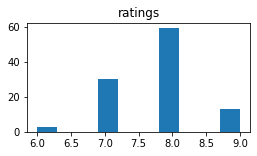

In [18]:
# what is the distribution of each variable
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

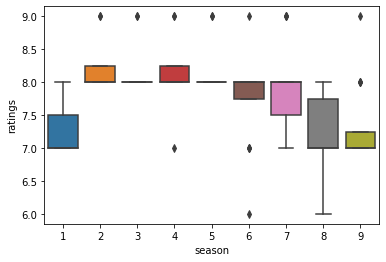

In [19]:
sns.boxplot(train.season, train.ratings)

plt.show()

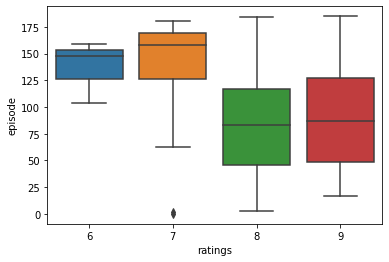

In [20]:
sns.boxplot(train.ratings, train.episode)

plt.show()

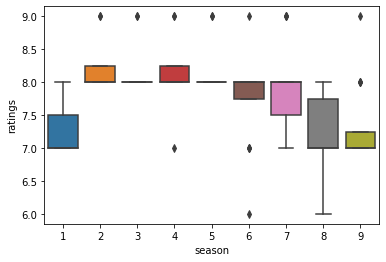

In [21]:
sns.boxplot(train.season, train.ratings)

plt.show()

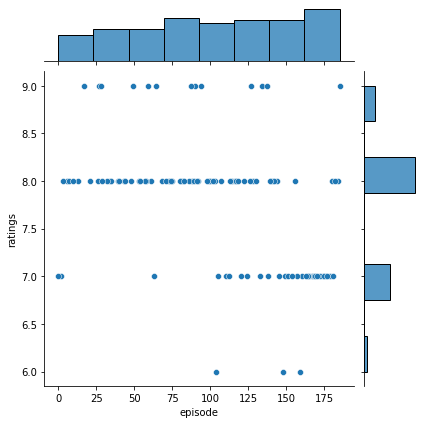

In [22]:
sns.jointplot(x="episode", y="ratings", data=train)
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

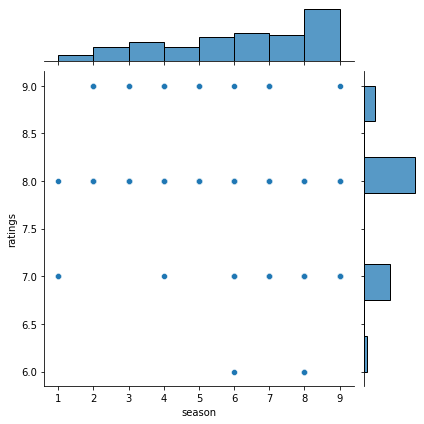

In [23]:
sns.jointplot(x="season", y="ratings", data=train)
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

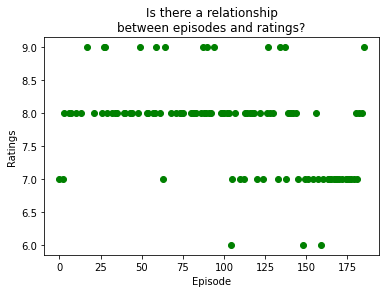

In [24]:
# plot age by spending_score
plt.scatter(train.episode, train.ratings, color='green')
plt.xlabel("Episode")
plt.ylabel("Ratings")
plt.title("Is there a relationship\nbetween episodes and ratings?")
plt.show()

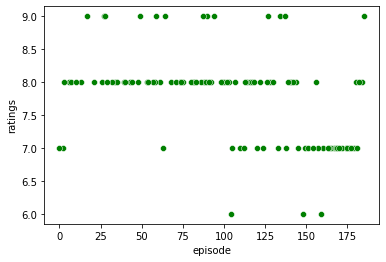

In [25]:
sns.scatterplot(x='episode', y='ratings',
                data=train, color='green')
plt.show()

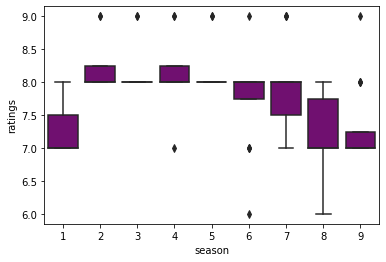

In [26]:
sns.boxplot(x='season', y='ratings',
                data=train, 
                color='purple')

plt.show()

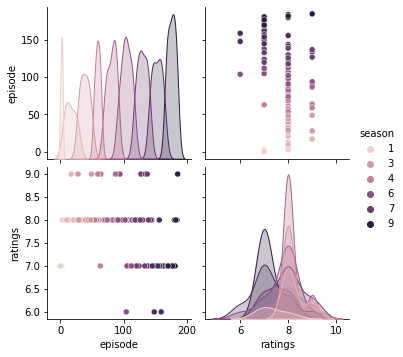

In [27]:
sns.pairplot(train, hue='season')
plt.show()

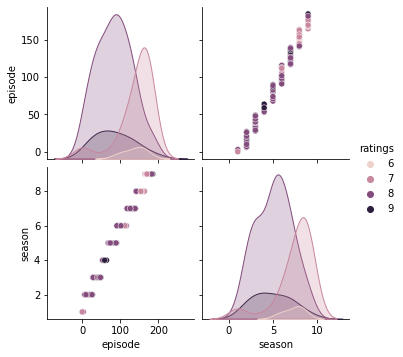

In [28]:
sns.pairplot(train, hue='ratings')
plt.show()

# K-Means

In [29]:
from sklearn.cluster import KMeans

In [30]:
df.drop(columns='season', inplace=True)
df.head()

,episode,ratings
0,0,7
1,1,8
2,2,7
3,3,8
4,4,8


In [31]:
X = df

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<AxesSubplot:xlabel='ratings'>

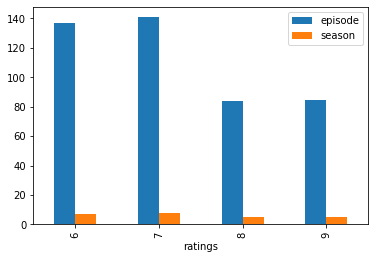

In [32]:
train.groupby('ratings').mean().plot.bar()

In [33]:
kmeans.cluster_centers_

array([[ 94.        ,   7.87301587],
       [156.5       ,   7.48387097],
       [ 31.        ,   8.03174603]])

In [34]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,episode,ratings
0,94.00,7.87
1,156.50,7.48
2,31.00,8.03


Text(0.5, 1.0, 'Visualizing Cluster Centers')

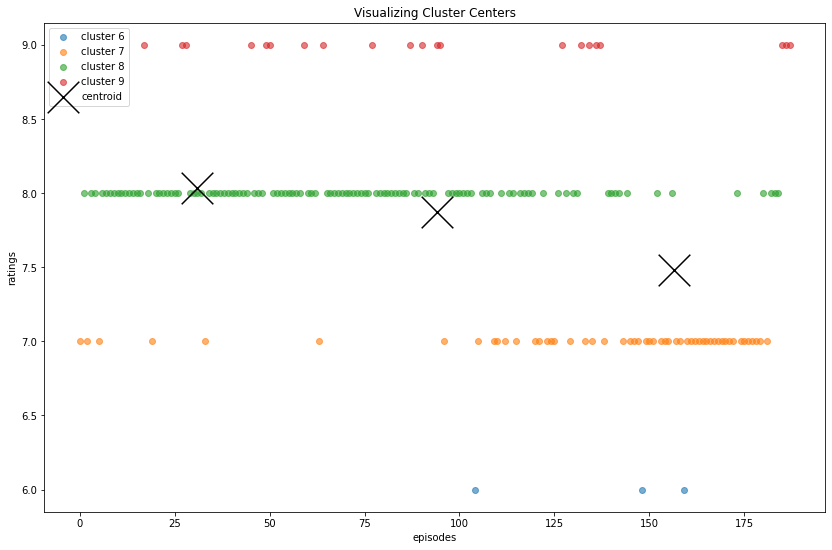

In [35]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('ratings'):
    plt.scatter(subset.episode, subset.ratings, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='ratings', x='episode', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('episodes')
plt.ylabel('ratings')
plt.title('Visualizing Cluster Centers')

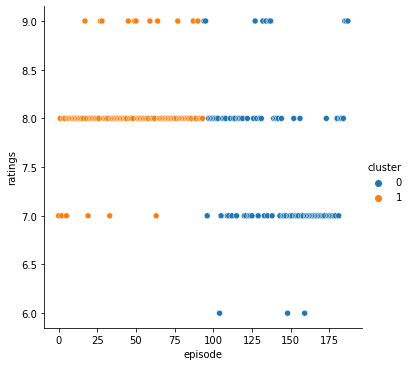

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='episode', y='ratings', hue='cluster')

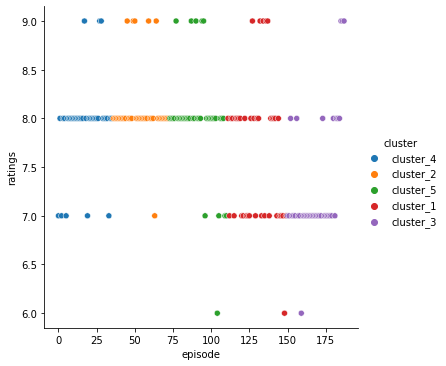

In [37]:
kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='episode', y='ratings', hue='cluster')

In [38]:
df.head()

,episode,ratings,cluster
0,0,7,cluster_4
1,1,8,cluster_4
2,2,7,cluster_4
3,3,8,cluster_4
4,4,8,cluster_4


In [39]:
df.tail()

,episode,ratings,cluster
183,183,8,cluster_3
184,184,8,cluster_3
185,185,9,cluster_3
186,186,9,cluster_3
187,187,9,cluster_3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   episode  188 non-null    int64 
 1   ratings  188 non-null    int64 
 2   cluster  188 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [46]:
df = df.drop(columns='cluster')
df.head()

,episode,ratings
0,0,7
1,1,8
2,2,7
3,3,8
4,4,8


In [49]:
X = X.drop(columns='cluster')
X.head()

,episode,ratings
0,0,7
1,1,8
2,2,7
3,3,8
4,4,8


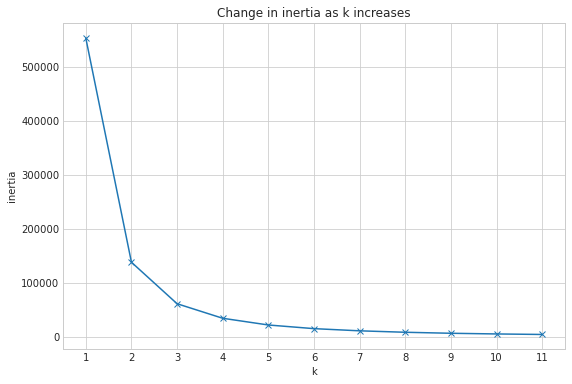

In [58]:
# choosing k with inertia: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(1, 12)}).plot(marker='x')
    plt.xticks(range(1, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

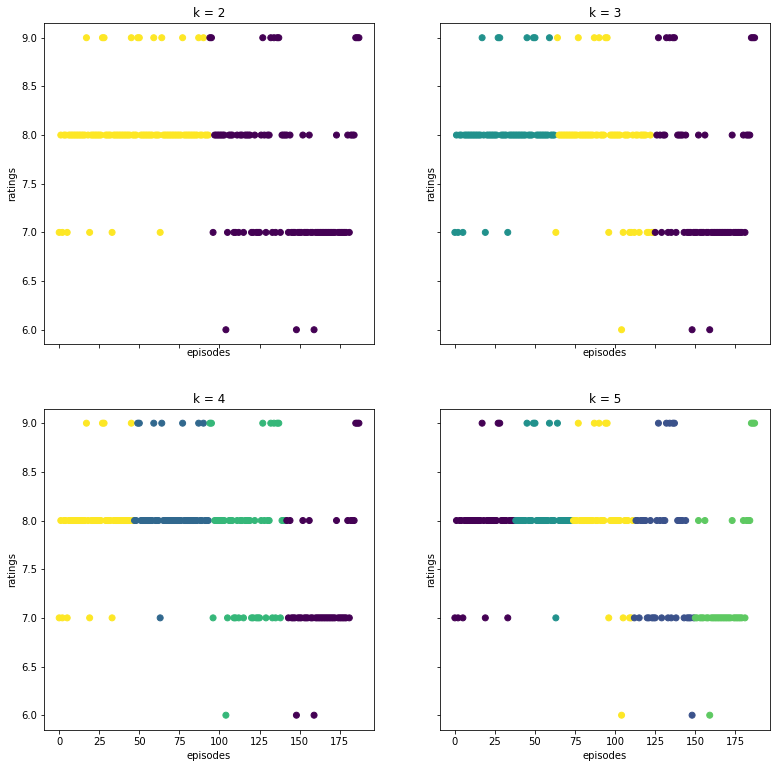

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.episode, X.ratings, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='episodes', ylabel='ratings')


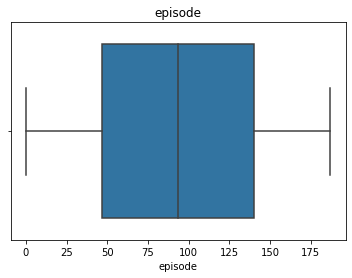

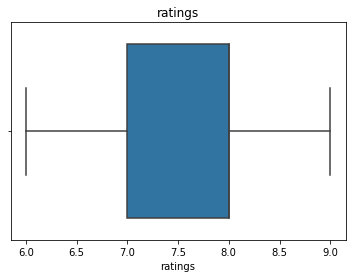

In [59]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [67]:
# list of variables I will cluster on. 
cluster_vars = ['episode', 'ratings']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [68]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

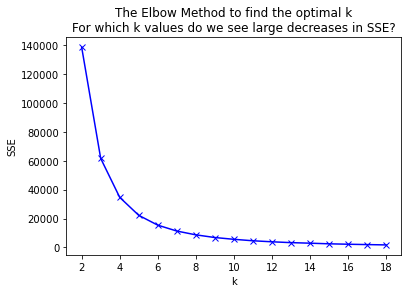

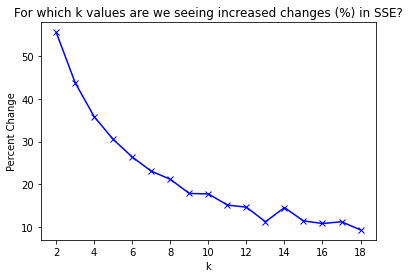

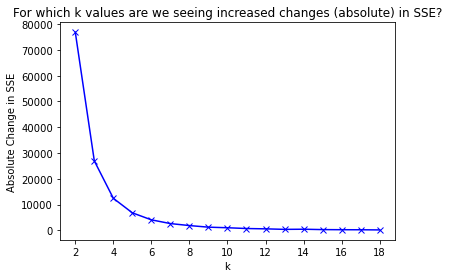

,k,sse,delta,pct_delta
0,2,"138,481.06","76,863.00",55.50
1,3,"61,618.29","26,944.00",43.70
2,4,"34,674.21","12,429.00",35.80
3,5,"22,245.31","6,791.00",30.50
4,6,"15,454.21","4,075.00",26.40
5,7,"11,379.36","2,627.00",23.10
6,8,"8,752.76","1,854.00",21.20
7,9,"6,898.51","1,236.00",17.90
8,10,"5,662.70","1,010.00",17.80
9,11,"4,652.27",706.00,15.20


In [70]:
find_k(X, cluster_vars, k_range)

In [71]:
k = 4
# as reminders: 
cluster_vars = ['episode', 'ratings']
cluster_name = 'area_cluster'

In [72]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [73]:
kmeans = create_clusters(X, k, cluster_vars)

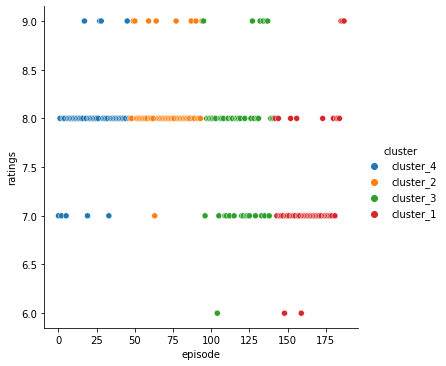

In [89]:
kmeans = KMeans(n_clusters=4).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='episode', y='ratings', hue='cluster')

In [90]:
df.head()

,episode,ratings,cluster
0,0,7,cluster_4
1,1,8,cluster_4
2,2,7,cluster_4
3,3,8,cluster_4
4,4,8,cluster_4
